In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../data/stock_price.csv')

## Understanding and Cleaning Data

In [21]:
df.head(10)

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
5,ABT,2014-01-02,38.0900,38.4000,38.0000,38.2300,4967472
6,ACN,2014-01-02,81.5000,81.9200,81.0900,81.1300,2405384
7,ADBE,2014-01-02,59.0600,59.5300,58.9400,59.2900,2746370
8,ADI,2014-01-02,49.5200,49.7500,49.0400,49.2800,2799092
9,ADM,2014-01-02,43.2200,43.2900,42.7900,42.9900,2753765


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   symbol  497472 non-null  object        
 1   date    497472 non-null  datetime64[ns]
 2   open    497472 non-null  float64       
 3   high    497472 non-null  float64       
 4   low     497464 non-null  float64       
 5   close   497472 non-null  float64       
 6   volume  497472 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 26.6+ MB


In [23]:
df['date'] = pd.to_datetime(df['date'])

In [26]:
df.isnull().sum()

symbol    0
date      0
open      0
high      0
low       8
close     0
volume    0
dtype: int64

In [25]:
# df['open'].fillna(method='ffill', inplace=True)
# df['high'].fillna(method='ffill', inplace=True)
# df['low'].fillna(method='ffill', inplace=True)

df[['open','high','close']] = df[['open','high','close']].ffill()

## EDA

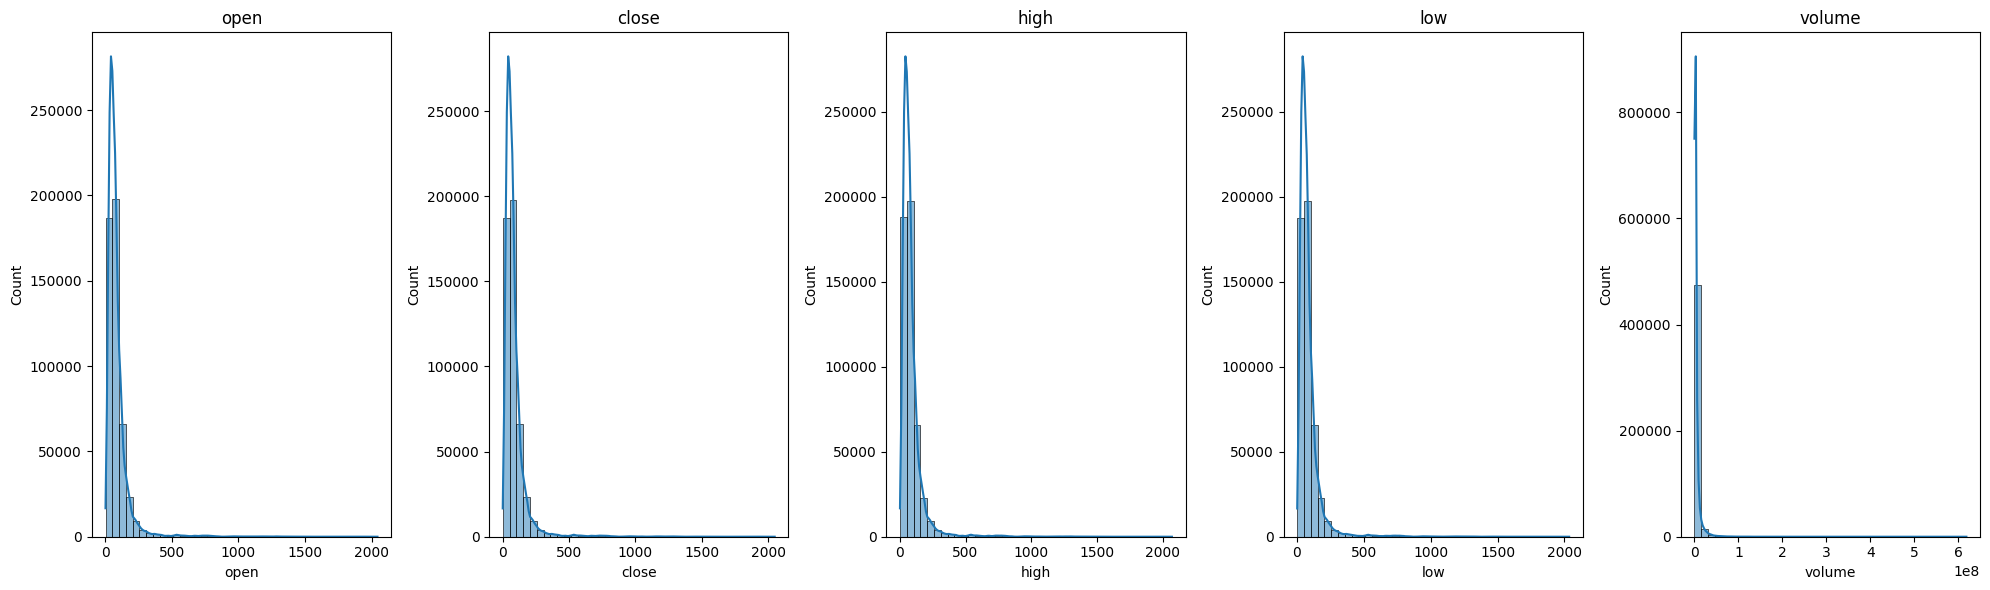

In [33]:
numerical_cols = ['open','close','high', 'low', 'volume']

fig, axes = plt.subplots(1, len(numerical_cols), figsize=(20,6))

for index, val in enumerate(numerical_cols):
    sns.histplot(df[val], bins=40, kde=True, ax=axes[index])
    axes[index].set_title(val)

plt.tight_layout()
plt.show()


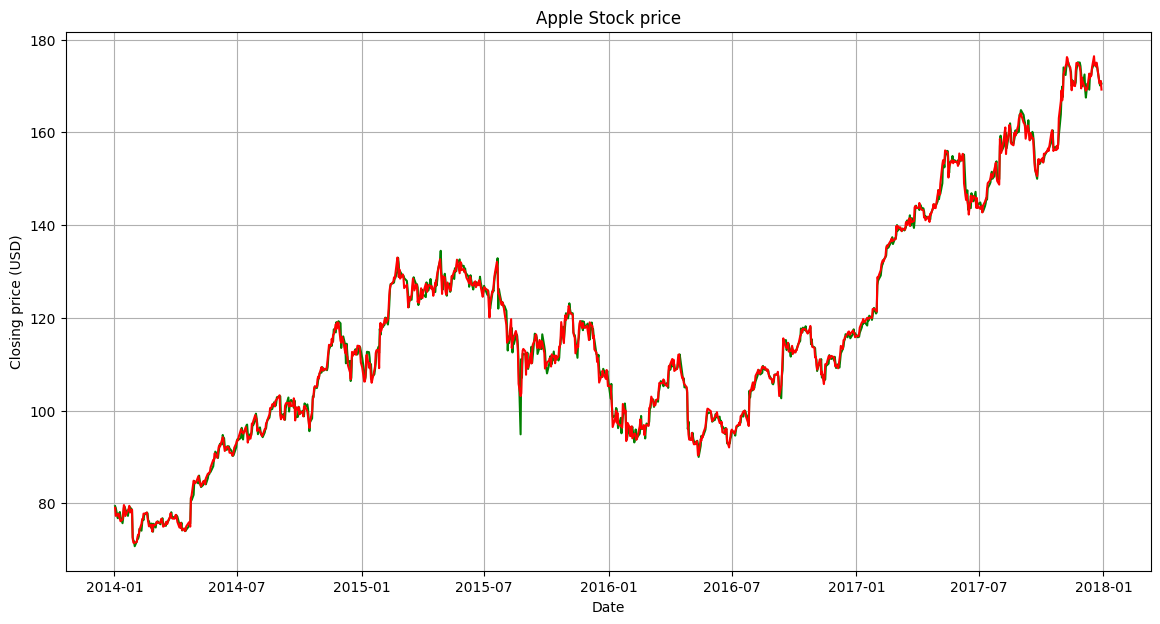

In [40]:
df_symbol = df[df['symbol'] == 'AAPL']

plt.figure(figsize=(14,7))
plt.plot(df_symbol['date'], df_symbol['open'], color='g')
plt.plot(df_symbol['date'], df_symbol['close'], color='r')

plt.title("Apple Stock price")
plt.xlabel("Date")
plt.ylabel("Closing price (USD)")
plt.grid(True)
plt.show()

- The opening and closing of Apple

In [41]:
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


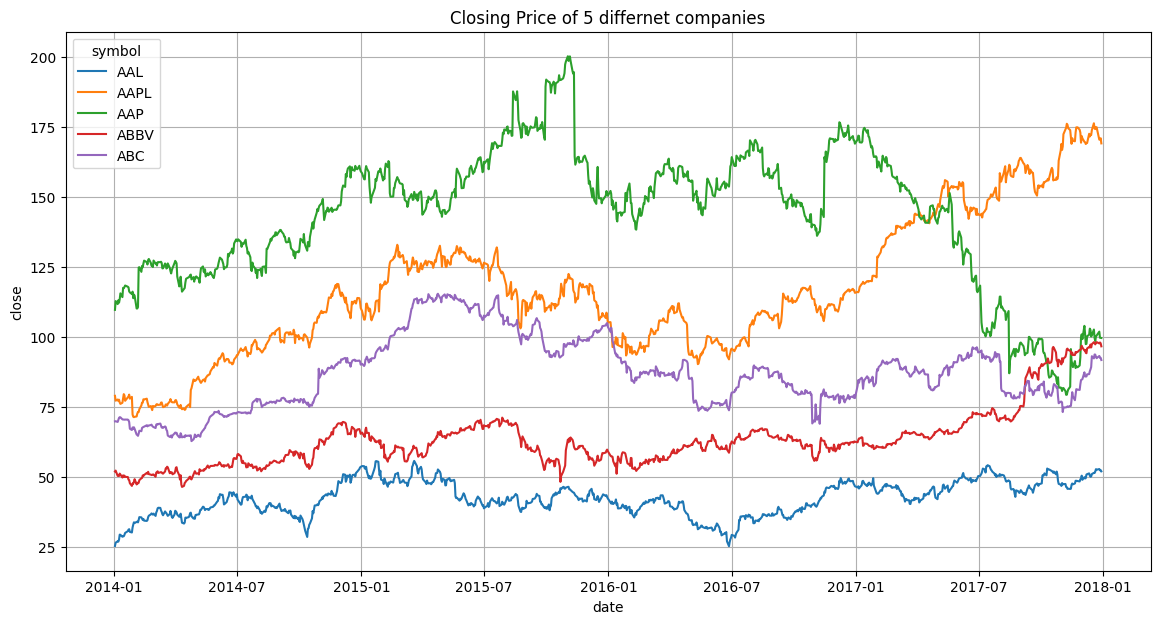

In [46]:
list_of_stocks = ['AAL','AAPL', 'AAP', 'ABBV', 'ABC']

df_multiple_symbols = df[df['symbol'].isin(list_of_stocks)]

plt.figure(figsize=(14,7))
sns.lineplot(data=df_multiple_symbols, x='date', y='close', hue='symbol')

plt.title('Closing Price of 5 differnet companies')
plt.grid(True)
plt.show()

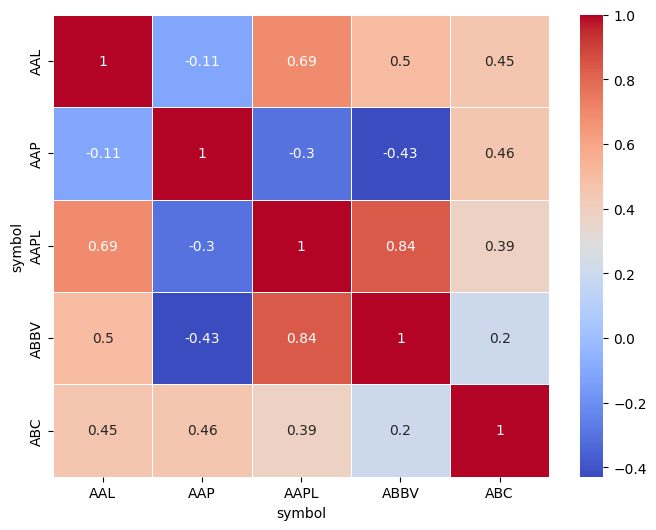

In [54]:
df_pivot = df_multiple_symbols.pivot(index='date', columns='symbol', values='close')

corr_matrix = df_pivot.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [55]:
df_pivot.corr()

symbol,AAL,AAP,AAPL,ABBV,ABC
symbol,,,,,
AAL,1.000000,-0.113342,0.688887,0.504646,0.453967
AAP,-0.113342,1.000000,-0.301453,-0.428910,0.457974
AAPL,0.688887,-0.301453,1.000000,0.836482,0.389703
ABBV,0.504646,-0.428910,0.836482,1.000000,0.200958
ABC,0.453967,0.457974,0.389703,0.200958,1.000000


## Feature Engineering

- Creating moving average

C:\Users\Bijay\AppData\Local\Temp\ipykernel_41960\2615546595.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


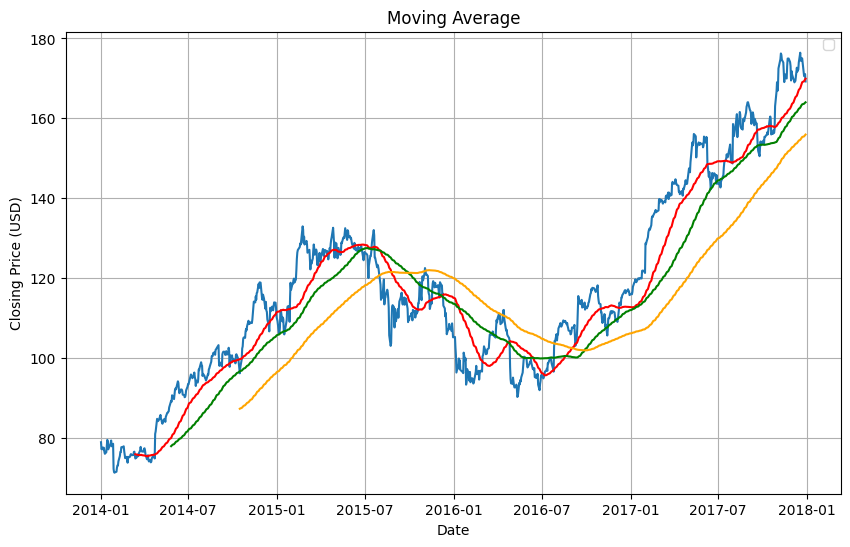

In [67]:
df_aapl = df[df['symbol'] == 'AAPL'].copy()

df_aapl['MA50'] = df_aapl['close'].rolling(window=50).mean()
df_aapl['MA100'] = df_aapl['close'].rolling(window=100).mean()
df_aapl['MA200'] = df_aapl['close'].rolling(window=200).mean()


plt.figure(figsize=(10,6))
plt.plot(df_aapl['date'], df_aapl['close'])
plt.plot(df_aapl['date'], df_aapl['MA50'], color='r')
plt.plot(df_aapl['date'], df_aapl['MA100'], color = 'g')
plt.plot(df_aapl['date'], df_aapl['MA200'], color = 'orange')

plt.title("Moving Average")
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

In [89]:
df.to_csv('cleaned_stock.csv', index=False)

In [69]:
df_aapl['Prediction'] = df_aapl['close'].shift(-1)

print(df_aapl.tail())

df_aapl.dropna(inplace=True)

features = ['close', 'MA50', 'MA100', 'MA200']

X = df_aapl[features]
y = df_aapl['Prediction']

       symbol       date    open     high      low   close    volume  \
494948   AAPL 2017-12-22  174.68  175.424  174.500  175.01  16349444   
495453   AAPL 2017-12-26  170.80  171.470  169.679  170.57  33185536   
495958   AAPL 2017-12-27  170.10  170.780  169.710  170.60  21498213   
496463   AAPL 2017-12-28  171.00  171.850  170.480  171.08  16480187   
496968   AAPL 2017-12-29  170.52  170.590  169.220  169.23  25999922   

            MA50     MA100      MA200  Prediction  
494948  169.0422  163.5133  155.34600      170.57  
495453  169.3138  163.6633  155.50285      170.60  
495958  169.5282  163.8054  155.66090      171.08  
496463  169.7404  163.9281  155.81400      169.23  
496968  169.9298  164.0196  155.95670         NaN  


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

acc = r2_score(y_test, y_pred)

print("\nAccuracy):", acc)
print("\nModel Performance (Mean Squared Error):", mse)
print("Root Mean Squared Error:", np.sqrt(mse))


Accuracy): 0.9924643281358081

Model Performance (Mean Squared Error): 3.6265529103798455
Root Mean Squared Error: 1.904351047044595


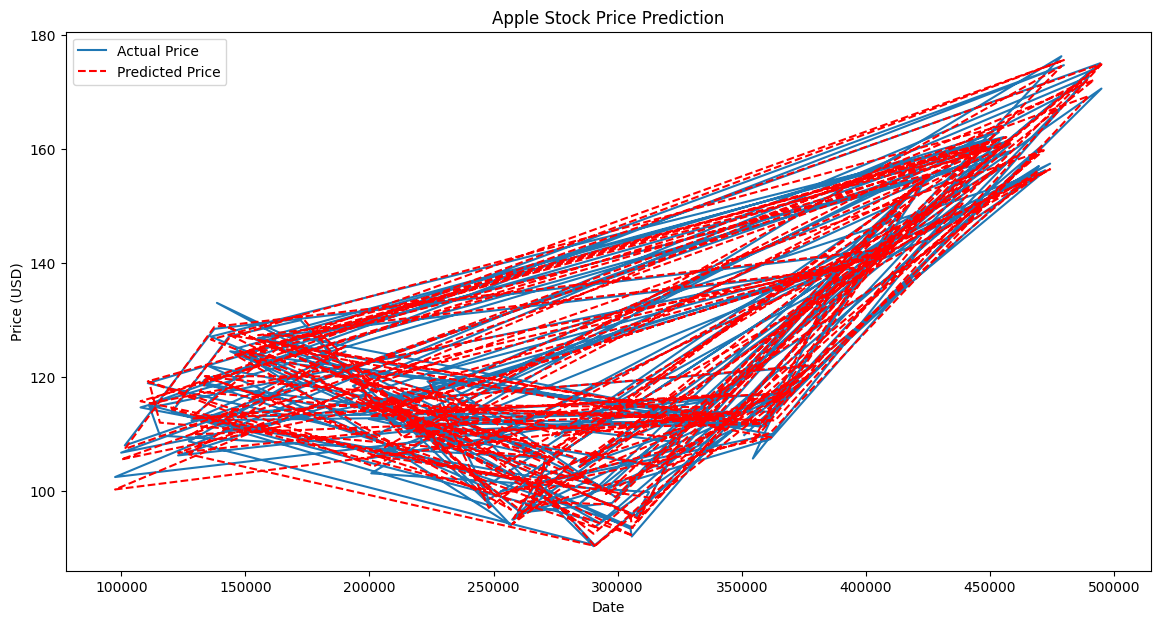

In [80]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='red', linestyle='--')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()